In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


    
#Import dataset
df = pd.read_excel('Online Retail.xlsx')

display(df.head())

# Keep only 500 random rows for working
df = df.sample(n=500, random_state=42).reset_index(drop=True)
print(f'Dataset reduced to {df.shape[0]} rows.')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Dataset reduced to 500 rows.


In [2]:
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    500 non-null    object        
 1   StockCode    500 non-null    object        
 2   Description  499 non-null    object        
 3   Quantity     500 non-null    int64         
 4   InvoiceDate  500 non-null    datetime64[ns]
 5   UnitPrice    500 non-null    float64       
 6   CustomerID   376 non-null    float64       
 7   Country      500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.4+ KB


None

,count,mean,min,25%,50%,75%,max,std
Quantity,500.0,9.294,-9.0,1.0,3.0,10.0,600.0,31.987842
InvoiceDate,500,2011-07-01 23:11:03.720000,2010-12-01 13:23:00,2011-03-23 15:26:15,2011-07-14 01:56:00,2011-10-20 10:16:45,2011-12-07 10:35:00,NaN
UnitPrice,500.0,3.93522,0.0,1.25,2.08,4.13,222.75,10.875319
CustomerID,376.0,15216.005319,12353.0,13698.5,15048.0,16728.25,18283.0,1758.507209


In [3]:
duplicates = df[df.duplicated()]

print(duplicates)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [4]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo        0
StockCode        0
Description      1
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     124
Country          0
dtype: int64


In [5]:
# Get all column names
all_variables = df.columns

# Target variable
output_variable = "Quantity"

# Feature variables(all columns except the target) 
features = all_variables.drop(output_variable).to_list()

print(features)


['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


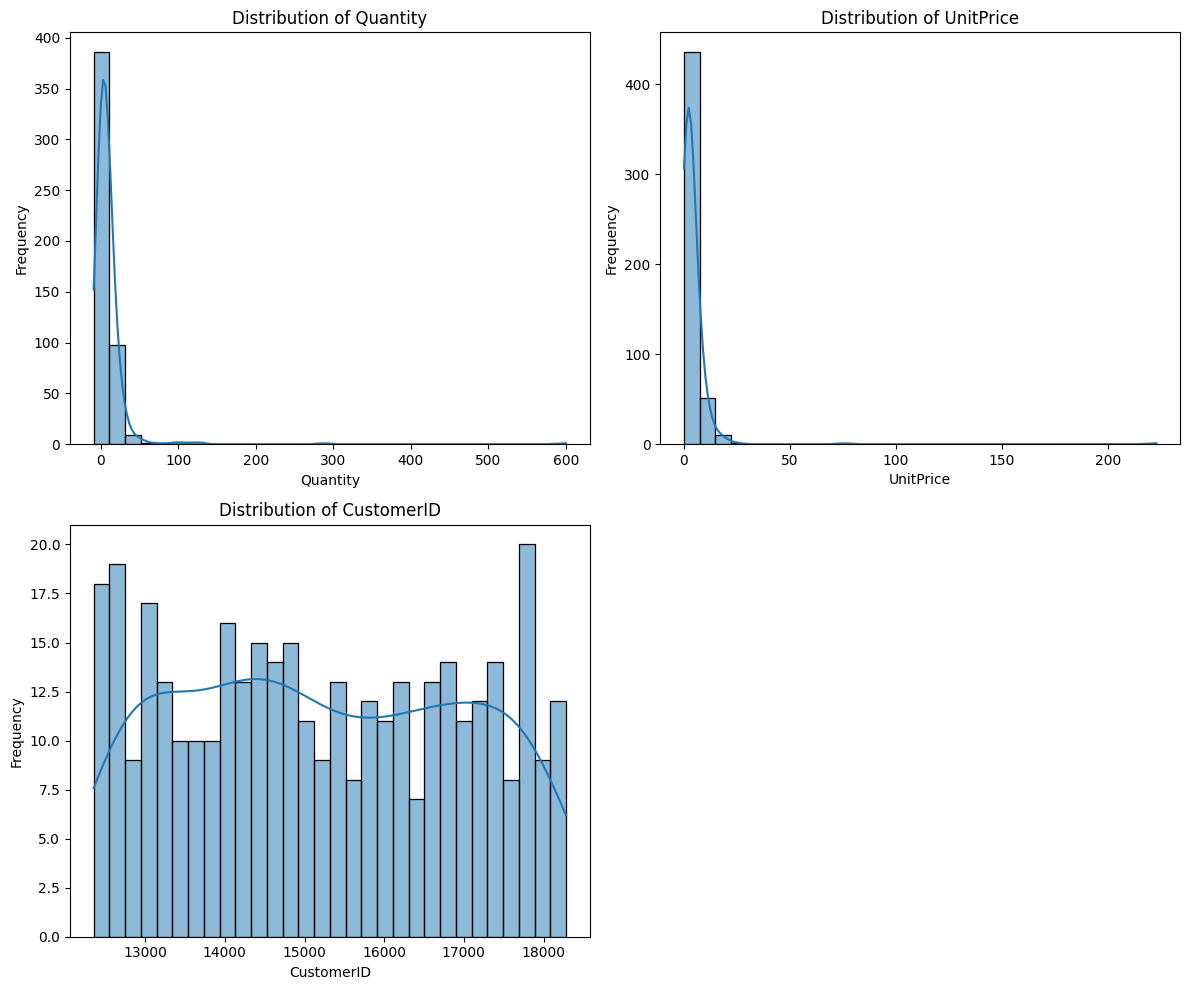

In [6]:
# Histogram of numerical features
numeric = df.select_dtypes(include='number').columns

plots = len(numeric)
rows = (plots // 2) + 1  
plt.figure(figsize=(12, 5 * rows))
for i, col in enumerate(numeric):
    plt.subplot(rows, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [7]:
# Drop rows with missing CustomerID or Description
df = df.dropna(subset=['CustomerID', 'Description'])

# Remove returns or incorrect entries 
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

#Fix data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
#create new columns to split the invoice date
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Convert text columns to category type 
df['Country'] = df['Country'].astype('category')
df['StockCode'] = df['StockCode'].astype('category')

# Turn category values into numbers 
df['CountryCode'] = df['Country'].cat.codes
df['ProductCode'] = df['StockCode'].cat.codes

print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'DayOfWeek',
       'Hour', 'CountryCode', 'ProductCode'],
      dtype='object')


In [9]:
# Scale UnitPrice and Quantity 
scaler = StandardScaler()
df[['UnitPrice', 'Quantity']] = scaler.fit_transform(df[['UnitPrice', 'Quantity']])



In [10]:
#Input
X = df[['ProductCode', 'UnitPrice', 'Hour', 'DayOfWeek', 'CountryCode']]

#Target we want to predict 
y = df['Quantity']  

# Training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Part 2: Model Building and Evaluation

# Import necessary libraries (extends imports)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import joblib

# Verify required objects exist
try:
    X_train.shape, X_test.shape, y_train.shape, y_test.shape, scaler
except NameError as e:
    raise NameError(f"Required variable missing: {e}. Ensure Part 1 and train-test split have run.")


In [12]:
# Block 1: Model Development
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='linear')  # Linear kernel for faster computation
}

for model_name, model in models.items():
    if model_name == 'SVR':
        # Subsample for SVR to drastically reduce runtime
        np.random.seed(42)  # reproducibility
        
        sample_size = min(500, len(X_train))  # Don't sample more than available
        sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
        
        X_train_sample = X_train.loc[sample_idx]
        y_train_sample = y_train.loc[sample_idx]
        
        model.fit(X_train_sample, y_train_sample)
        print(f"Trained {model_name} model on {sample_size} rows")
    else:
        model.fit(X_train, y_train)
        print(f"Trained {model_name} model")

Trained Linear Regression model
Trained Random Forest model
Trained SVR model on 292 rows


In [13]:
# Block 2: Hyperparameter Tuning
# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'SVR': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.5]
    }
}

# Perform tuning
best_models = {}
for model_name in models:
    if model_name in param_distributions:
        if model_name == 'SVR':
            # Use subsampled data for SVR tuning
            np.random.seed(42)  # Set seed for reproducibility
            
            sample_size = min(500, len(X_train))
            sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
            X_train_sample = X_train.loc[sample_idx]
            y_train_sample = y_train.loc[sample_idx]
            
            random_search = RandomizedSearchCV(
                estimator=models[model_name],
                param_distributions=param_distributions[model_name],
                n_iter=1,  # Minimal iterations
                cv=2,      # Minimal folds
                scoring='r2',
                n_jobs=1,
                random_state=42
            )
            random_search.fit(X_train_sample, y_train_sample)
        else:
            random_search = RandomizedSearchCV(
                estimator=models[model_name],
                param_distributions=param_distributions[model_name],
                n_iter=10,
                cv=10,
                scoring='r2',
                n_jobs=-1,
                random_state=42
            )
            random_search.fit(X_train, y_train)

        best_models[model_name] = random_search.best_estimator_
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
    else:
        # Linear Regression: no tuning needed
        best_models[model_name] = models[model_name]
        print(f"No tuning for {model_name}")


No tuning for Linear Regression
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
Best parameters for SVR: {'epsilon': 0.1, 'C': 10}


In [14]:
# Block 3: Model Evaluation
# Function to inverse transform Quantity
def inverse_transform_quantity(y):
    try:
        # Convert y to NumPy array if it's a Pandas Series
        y_np = y.to_numpy() if isinstance(y, pd.Series) else y
        dummy = np.zeros_like(y_np).reshape(-1, 1)
        scaled = np.hstack([dummy, y_np.reshape(-1, 1)])
        return scaler.inverse_transform(scaled)[:, 1]
    except Exception as e:
        raise ValueError(f"Error in inverse_transform_quantity: {e}. Ensure scaler is fit on [UnitPrice, Quantity].")

# Evaluate models
results = {
    'Model': [],
    'Train RMSE (Std)': [],
    'Test RMSE (Std)': [],
    'Train MAE (Std)': [],
    'Test MAE (Std)': [],
    'Train RMSE (Orig)': [],
    'Test RMSE (Orig)': [],
    'Train MAE (Orig)': [],
    'Test MAE (Orig)': [],
    'Train R²': [],
    'Test R²': [],
    'CV R² (Mean)': [],
    'CV R² (Std)': []
}

for model_name, model in best_models.items():
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Standardized metrics
    train_rmse_std = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse_std = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae_std = mean_absolute_error(y_train, y_pred_train)
    test_mae_std = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Original scale metrics
    y_train_orig = inverse_transform_quantity(y_train)
    y_test_orig = inverse_transform_quantity(y_test)
    y_pred_train_orig = inverse_transform_quantity(y_pred_train)
    y_pred_test_orig = inverse_transform_quantity(y_pred_test)
    
    train_rmse_orig = np.sqrt(mean_squared_error(y_train_orig, y_pred_train_orig))
    test_rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_test_orig))
    train_mae_orig = mean_absolute_error(y_train_orig, y_pred_train_orig)
    test_mae_orig = mean_absolute_error(y_test_orig, y_pred_test_orig)
    
    # 10-fold cross-validation 
    if model_name != 'SVR':
        cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    else:
        cv_mean = np.nan
        cv_std = np.nan
    
    # Store results
    results['Model'].append(model_name)
    results['Train RMSE (Std)'].append(train_rmse_std)
    results['Test RMSE (Std)'].append(test_rmse_std)
    results['Train MAE (Std)'].append(train_mae_std)
    results['Test MAE (Std)'].append(test_mae_std)
    results['Train RMSE (Orig)'].append(train_rmse_orig)
    results['Test RMSE (Orig)'].append(test_rmse_orig)
    results['Train MAE (Orig)'].append(train_mae_orig)
    results['Test MAE (Orig)'].append(test_mae_orig)
    results['Train R²'].append(train_r2)
    results['Test R²'].append(test_r2)
    results['CV R² (Mean)'].append(cv_mean)
    results['CV R² (Std)'].append(cv_std)

# Display results
results_df = pd.DataFrame(results)
print("Model Evaluation Metrics:")
display(results_df)

Model Evaluation Metrics:


,Model,Train RMSE (Std),Test RMSE (Std),Train MAE (Std),Test MAE (Std),Train RMSE (Orig),Test RMSE (Orig),Train MAE (Orig),Test MAE (Orig),Train R²,Test R²,CV R² (Mean),CV R² (Std)
0,Linear Regression,1.090459,0.323869,0.344243,0.265627,40.301383,11.969612,12.722603,9.817092,0.035341,-0.442537,-0.617647,0.802494
1,Random Forest,0.623627,0.376353,0.176098,0.213419,23.048114,13.909331,6.508273,7.887590,0.684496,-0.947956,-9.654443,25.018885
2,SVR,1.114505,0.275670,0.322586,0.232769,41.190088,10.188251,11.922179,8.602729,-0.007672,-0.045120,NaN,NaN


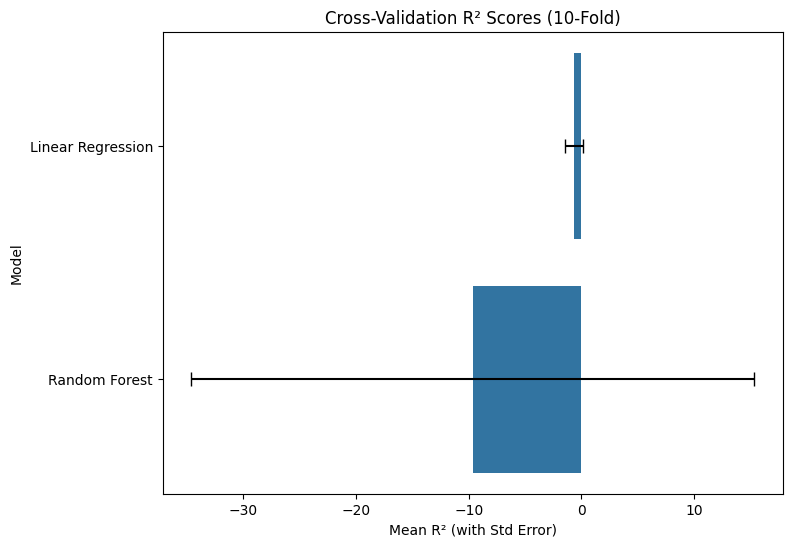

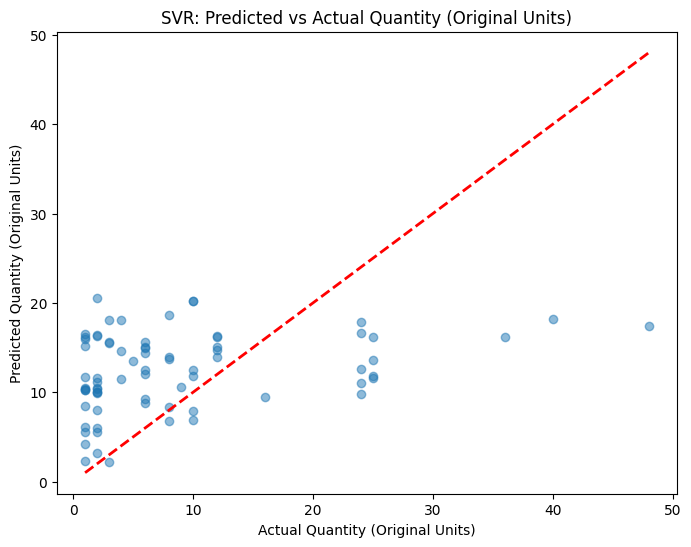

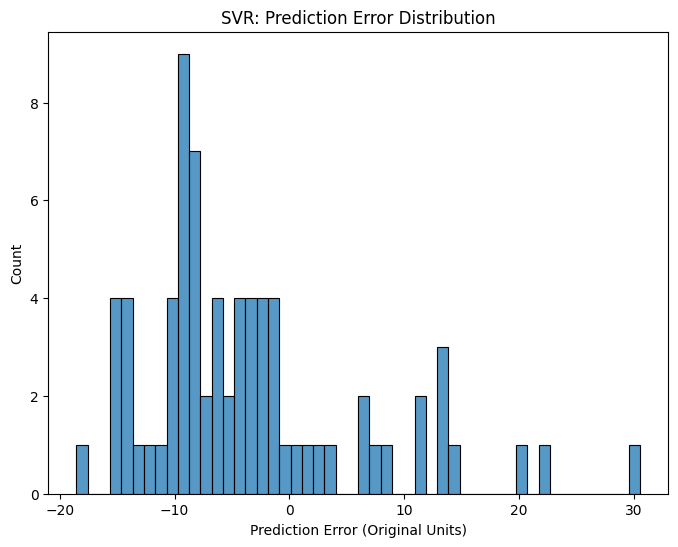

In [15]:
# Block 4: Visualize Model Performance
# Plot CV R² scores (exclude NaN for SVR)
plt.figure(figsize=(8, 6))
sns.barplot(x='CV R² (Mean)', y='Model', data=results_df[results_df['CV R² (Mean)'].notna()])
plt.errorbar(x=results_df[results_df['CV R² (Mean)'].notna()]['CV R² (Mean)'], 
             y=results_df[results_df['CV R² (Mean)'].notna()]['Model'], 
             xerr=results_df[results_df['CV R² (Mean)'].notna()]['CV R² (Std)'], 
             fmt='none', c='black', capsize=5)
plt.title('Cross-Validation R² Scores (10-Fold)')
plt.xlabel('Mean R² (with Std Error)')
plt.ylabel('Model')
plt.show()

# Plot predicted vs actual for best model
best_model_name = results_df.loc[results_df['Test R²'].idxmax(), 'Model']
y_pred_test_best = best_models[best_model_name].predict(X_test)
y_test_orig = inverse_transform_quantity(y_test)
y_pred_test_orig = inverse_transform_quantity(y_pred_test_best)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_orig, y_pred_test_orig, alpha=0.5)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', lw=2)
plt.xlabel('Actual Quantity (Original Units)')
plt.ylabel('Predicted Quantity (Original Units)')
plt.title(f'{best_model_name}: Predicted vs Actual Quantity (Original Units)')
plt.show()

# Plot prediction error histogram
errors = y_test_orig - y_pred_test_orig
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=50)
plt.title(f'{best_model_name}: Prediction Error Distribution')
plt.xlabel('Prediction Error (Original Units)')
plt.ylabel('Count')
plt.show()

In [18]:

import os
import pickle

# Save each model separately
os.makedirs("../artifacts", exist_ok=True)

for model_name, model in best_models.items():
    model_filename = f"../artifacts/{model_name.replace(' ', '_')}.pkl"
    with open(model_filename, "wb") as f:
        pickle.dump(model, f)
    print(f"Saved {model_name} to {model_filename}")

# Save final model separately too
final_model_name = best_model_name
final_model = best_models[final_model_name]

final_model_filename = f"../artifacts/final_model.pkl"
with open(final_model_filename, "wb") as f:
    pickle.dump(final_model, f)
print(f"Saved Final Model to {final_model_filename}")


Saved Linear Regression to ../artifacts/Linear_Regression.pkl
Saved Random Forest to ../artifacts/Random_Forest.pkl
Saved SVR to ../artifacts/SVR.pkl
Saved Final Model to ../artifacts/final_model.pkl


In [18]:
import os
import pickle
with open("../artifacts/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [22]:
new_input = {
    "ProductCode": 71459,
    "UnitPrice": -0.703754,
    "Hour": 12,
    "DayOfWeek": 2,
    "CountryCode": 17
}

import numpy as np
import pandas as pd
import pickle

# Load the trained SVR model
with open("../artifacts/SVR.pkl", "rb") as f:
    svr_model = pickle.load(f)

# Load the saved StandardScaler
with open("../artifacts/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Create DataFrame for new input
new_data = pd.DataFrame([{
    "ProductCode": new_input["ProductCode"],
    "UnitPrice": new_input["UnitPrice"],
    "Hour": new_input["Hour"],
    "DayOfWeek": new_input["DayOfWeek"],
    "CountryCode": new_input["CountryCode"]
}])

# Scale UnitPrice and a dummy Quantity (Quantity is required only for scaling)
dummy_quantity = 0  # This won't be used in prediction, only for matching column structure
scaled_features = scaler.transform([[new_data['UnitPrice'].iloc[0], dummy_quantity]])
new_data['UnitPrice'] = scaled_features[0][0]

# Prepare input features for prediction
X_new = new_data[["ProductCode", "UnitPrice", "Hour", "DayOfWeek", "CountryCode"]]

# Predict
prediction = svr_model.predict(X_new)

print(f"Predicted Quantity: {prediction[0]}")


Predicted Quantity: 61.22615416348518


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,DayOfWeek,Hour,CountryCode,ProductCode
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,0.326761,2011-06-01 12:05:00,-0.703754,17315.0,United Kingdom,2011-06,2,12,17,261
1,554974,21128,GOLD FISHING GNOME,-0.214391,2011-05-27 17:14:00,1.271954,14031.0,United Kingdom,2011-05,4,17,17,26
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,-0.214391,2011-04-21 17:05:00,-0.768531,14031.0,United Kingdom,2011-04,3,17,17,20
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,-0.241449,2011-11-16 10:39:00,-0.347479,17198.0,United Kingdom,2011-11,2,10,17,162
4,546157,22180,RETROSPOT LAMP,-0.268506,2011-03-10 08:40:00,2.243613,13502.0,United Kingdom,2011-03,3,8,17,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,541265,85099C,JUMBO BAG BAROQUE BLACK WHITE,-0.268506,2011-01-16 16:23:00,-0.347479,17609.0,United Kingdom,2011-01,6,16,17,311
495,566276,22705,WRAP GREEN PEARS,0.353819,2011-09-11 14:00:00,-0.843025,13450.0,United Kingdom,2011-09,6,14,17,151
496,558111,23091,ZINC HERB GARDEN CONTAINER,-0.295564,2011-06-26 16:06:00,1.045233,17114.0,United Kingdom,2011-06,6,16,17,196
498,578953,20752,BLUE POLKADOT WASHING UP GLOVES,-0.268506,2011-11-27 14:50:00,-0.298896,13546.0,United Kingdom,2011-11,6,14,17,8
